## Machine Learning Assessment Task


# 1.Uploading and Understanding the dataset:

In [1]:
# First we need to import some libraries

import numpy as np
import statistics as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Downloading the dataset from 
https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

In [2]:
# Uploading the dataset
data = pd.read_csv("Melbourne_data.csv")

In [3]:
# We can see how is the dataset and ask what is the problem that we need to solve
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
# The code below helps in identifying data anomalies and understanding the underlying patterns.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# 2. Cleaning the dataset

In [5]:
# Dropping columns that are not relevant

data = data.drop(["Suburb", "Address", "SellerG", "Date"],axis=1)

In [6]:
data.shape

(13580, 17)

In [7]:
# Checking missing values:
data.isnull().sum()

Rooms               0
Type                0
Price               0
Method              0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [8]:
# Dropping Columns with more than 20% missing values
data = data.drop(["BuildingArea","YearBuilt","CouncilArea"],axis=1)

In [9]:
data.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,2,h,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [10]:
# Using the following formulas I can transform categorical variables into numerical ones:
#.unique() and map
data["Type"].unique()

array(['h', 'u', 't'], dtype=object)

In [11]:
# Apply function
map = {'h': 1, 'u': 2, 't': 3}

data['Type'] = data['Type'].map(map)

In [12]:
data.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,2,1,1480000.0,S,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,1,1035000.0,S,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,1,1465000.0,SP,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,1,850000.0,PI,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,1,1600000.0,VB,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0


In [13]:
data["Method"].unique()

array(['S', 'SP', 'PI', 'VB', 'SA'], dtype=object)

In [14]:
map = {'S': 1, 'SP': 2, 'PI': 3, 'VB': 4, 'SA': 5}

data['Method'] = data['Method'].map(map)

In [15]:
data["Regionname"].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [16]:
map = {'Northern Metropolitan': 1, 'Western Metropolitan': 2, 'Southern Metropolitan': 3, 
       'Eastern Metropolitan': 4, 'South-Eastern Metropolitan': 5, 
       'Eastern Victoria': 6, 'Northern Victoria': 7, 'Western Victoria': 8}

data['Regionname'] = data['Regionname'].map(map)

In [17]:
data.head()

,Rooms,Type,Price,Method,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,2,1,1480000.0,1,2.5,3067.0,2.0,1.0,1.0,202.0,-37.7996,144.9984,1,4019.0
1,2,1,1035000.0,1,2.5,3067.0,2.0,1.0,0.0,156.0,-37.8079,144.9934,1,4019.0
2,3,1,1465000.0,2,2.5,3067.0,3.0,2.0,0.0,134.0,-37.8093,144.9944,1,4019.0
3,3,1,850000.0,3,2.5,3067.0,3.0,2.0,1.0,94.0,-37.7969,144.9969,1,4019.0
4,4,1,1600000.0,4,2.5,3067.0,3.0,1.0,2.0,120.0,-37.8072,144.9941,1,4019.0


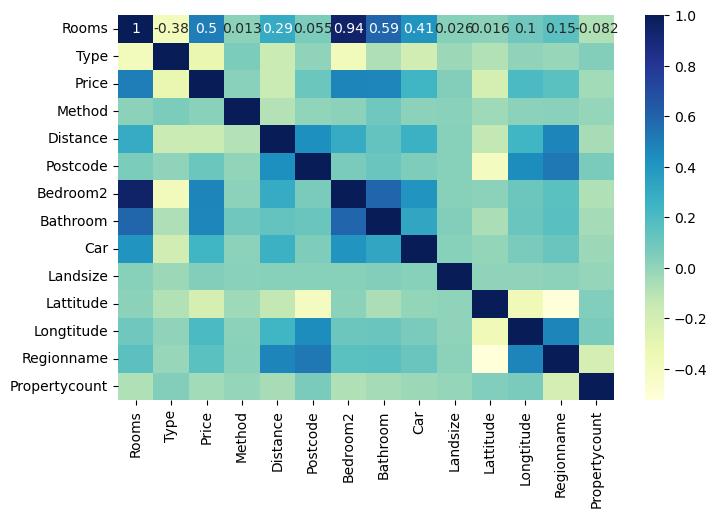

In [18]:
# Showing the correlation between variables
plt.figure(figsize=(8,5))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")
plt.show()

C:\Users\lorra\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


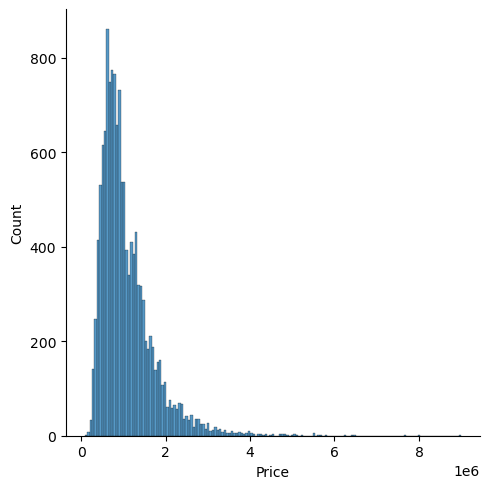

In [19]:
sns.displot(data["Price"])

In [20]:
#sns.displot(data)

# 3.1.Summary Statistics: 

In [21]:
# Median
def calc_median(variable):
    if len(variable) == 0:
        return None
    variable = variable.sort_values(ignore_index = True)
    n = len(variable)
    if n % 2 == 0:
        mid1 = variable[n // 2 - 1]
        mid2 = variable[n // 2]
        median = ((mid1 + mid2) / 2)
        return median
    else:
        median = variable[n // 2]
        return median

In [22]:
calc_median(data['Price'])

903000.0

In [23]:
# mode
def calc_mode(variable):
    if len(variable) == 0:
        return None
    num_freq = {}
    for num in variable:
        if num in num_freq:
            num_freq[num] += 1
        else:
            num_freq[num] = 1
    max_count = max(num_freq.values())
    mode = [num for num, count in num_freq.items() if count == max_count]
    if len(mode) == len(variable):
        return "No mode available"
    return mode

In [24]:
calc_mode(data["Price"])

[1100000.0]

In [25]:
# Mean:
def calc_mean(variable):
    if len(variable) == 0:
        return None
    mean = sum(variable) / len(variable)
    return mean

In [26]:
calc_mean(data["Price"])

1075684.079455081

In [27]:
# Standard Deviation:
std_deviation_numpy = np.std(data)
print("Standard deviation using numpy:", std_deviation_numpy)

Standard deviation using numpy: Rooms                 0.955713
Type                  0.633341
Price            639287.185176
Method                1.034197
Distance              5.868509
Postcode             90.673625
Bedroom2              0.965885
Bathroom              0.691686
Car                   0.962598
Landsize           3990.522307
Lattitude             0.079257
Longtitude            0.103912
Regionname            1.187393
Propertycount      4378.420554
dtype: float64


C:\Users\lorra\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


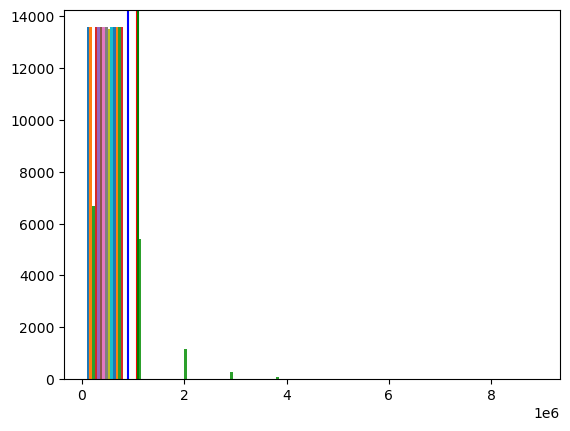

mean: 1075684.079455081
median: 903000.0
mode: [1100000.0]


In [28]:
mean = calc_mean(data["Price"])
median = calc_median(data["Price"])
mode = calc_mode(data["Price"])

plt.hist(data);
plt.axvline(x=mean, color='r', linestyle='-')
plt.axvline(x=median, color='b', linestyle='-')
plt.axvline(x=mode[0], color='g', linestyle='-')
plt.show()

print('mean: '+ str(mean))
print('median: '+ str(median))
print('mode: '+ str(mode))

In [29]:
# Calculate minimum for each variable
minimum = data.min()

In [30]:
# Calculate maximum for each variable
maximum = data.max()

In [31]:
# Calculate quartiles for each variable
quartiles = data.quantile([0.25, 0.5, 0.75])

In [32]:
# Print the results
print("Minimum:")
print(minimum)
print("\nMaximum:")
print(maximum)
print("\nQuartiles:")
print(quartiles)

Minimum:
Rooms                1.00000
Type                 1.00000
Price            85000.00000
Method               1.00000
Distance             0.00000
Postcode          3000.00000
Bedroom2             0.00000
Bathroom             0.00000
Car                  0.00000
Landsize             0.00000
Lattitude          -38.18255
Longtitude         144.43181
Regionname           1.00000
Propertycount      249.00000
dtype: float64

Maximum:
Rooms            1.000000e+01
Type             3.000000e+00
Price            9.000000e+06
Method           5.000000e+00
Distance         4.810000e+01
Postcode         3.977000e+03
Bedroom2         2.000000e+01
Bathroom         8.000000e+00
Car              1.000000e+01
Landsize         4.330140e+05
Lattitude       -3.740853e+01
Longtitude       1.455264e+02
Regionname       8.000000e+00
Propertycount    2.165000e+04
dtype: float64

Quartiles:
      Rooms  Type      Price  Method  Distance  Postcode  Bedroom2  Bathroom  \
0.25    2.0   1.0   650000.0     

# 4. Applying the Machine Learning models

# 4.1.Linear Regression
Is the simplest and most classic linear method for Regression

In [33]:
#"I will choose the variable that has the highest correlation with Landsize, 
#since we removed BuildingArea."
data1 = data[["Price","Rooms","Bathroom","Bedroom2","Car","Landsize"]]

In [34]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     13580 non-null  float64
 1   Rooms     13580 non-null  int64  
 2   Bathroom  13580 non-null  float64
 3   Bedroom2  13580 non-null  float64
 4   Car       13518 non-null  float64
 5   Landsize  13580 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 636.7 KB


In [35]:
# We need to handle null values in the Car`s column because it can interfere in results.
data1 = data1.dropna(axis=0)

In [36]:
data1.head()

,Price,Rooms,Bathroom,Bedroom2,Car,Landsize
0,1480000.0,2,1.0,2.0,1.0,202.0
1,1035000.0,2,1.0,2.0,0.0,156.0
2,1465000.0,3,2.0,3.0,0.0,134.0
3,850000.0,3,2.0,3.0,1.0,94.0
4,1600000.0,4,1.0,3.0,2.0,120.0


In [37]:
# Separate between the variable that we want to predict (Y) 
# and which columns we will use for this prediction (X).
Y = data1.Price
X = data1.drop('Price', axis=1)

In [38]:
#After that, we will divide our dataset into two parts: training and testing.
#The training dataset will be used to train the model, allowing it to make predictions.
#The test dataset will be used to evaluate the performance of the already trained model, 
#comparing its predictions with actual values and calculating the associated error.

from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize cross-validation
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

In [39]:
# Show the rows and columns
X.shape, Y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13518, 5), (13518,), (10814, 5), (2704, 5), (10814,), (2704,))

In [40]:
# Method to calculate the score
def get_cv_scores(model):
    scores = cross_val_score(model,
                             x_train,
                             y_train,
                             cv = 10,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [41]:
# Train the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
lr = LinearRegression().fit(x_train, y_train)

# Calculate the mean values and Standard deviation
get_cv_scores(lr)

CV Mean:  0.2897771686110292
STD:  0.03660014008077648




In [42]:
regression_model = LinearRegression()

# Fitting the model
regression_model.fit(x_train,y_train)

#Using the Linear Regression to predict the datas of test
y_regression = regression_model.predict(x_test)

In [43]:
# Calculate the predicted values
y_pred = lr.predict(x_test)
# y_pred
print(y_pred)

[1200506.01171206 1224503.24362464 1204862.6182885  ... 1671016.66564442
 1672099.79509791  948799.72294404]


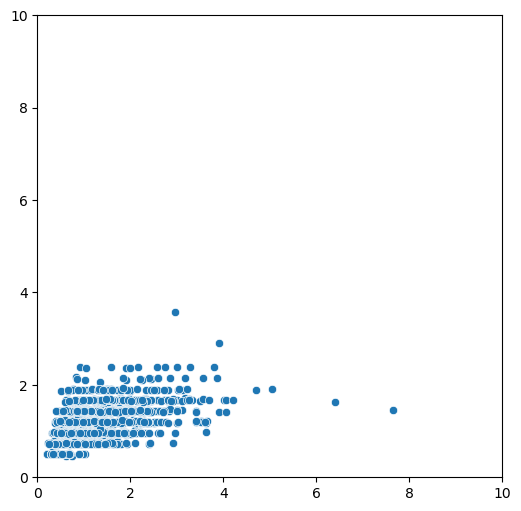

In [44]:
# Using the following codes, we can visualize the predicted points X real.

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test.values/1000000,y=y_regression/1000000)
plt.ylim(0,10)
plt.xlim(0,10)
plt.show()

In [45]:
# To check if the chosen model is good, we need to eliminate the errors:
# Evaluating Mean Squared Error
from sklearn.metrics import mean_squared_error
squared_error_regression = mean_squared_error(y_test,y_regression)
print(squared_error_regression)

275605530618.60474


In [46]:
# Evaluating R2 score
from sklearn.metrics import r2_score
r2_regression = r2_score(y_test,y_regression)
print(r2_regression)

0.30507267338769317


In [47]:
# Display the test and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(10)

,Actual,Predicted
12114,921000.0,1.200506e+06
3505,715000.0,1.224503e+06
13201,915000.0,1.204863e+06
2364,1240000.0,1.203905e+06
1136,1230000.0,9.818952e+05
313,1435000.0,1.204631e+06
11161,1480000.0,9.812472e+05
1460,851000.0,9.586458e+05
9423,925000.0,1.260914e+06
8633,500000.0,7.259064e+05


In [48]:
# Calculate the error values
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 371171.9401981476
Mean Squared Error: 275605530618.60474
Root Mean Squared Error: 524981.4574045495


# 3.2.Decision Tree
Decision Tree is a supervised classification method. A decision tree is a graph in the shape of a tree, a sequential diagram that shows all of the potential decision options and their associated results.

In [49]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor()

# Fitting the model
decision_tree_model.fit(x_train,y_train)

# Using the Decision Tree to predict the data of test
y_decision_tree = decision_tree_model.predict(x_test)

In [50]:
# To check if the chosen model is good, we need to eliminate the errors:
# Evaluating Mean Squared Error
decision_tree_squared_error = mean_squared_error(y_test,y_decision_tree)
print(decision_tree_squared_error)

# R quadrado
r2_decision_tree = r2_score(y_test,y_decision_tree)
print(r2_decision_tree)

456416409211.36707
-0.1508340720279906


In [51]:
print('Linear Regression')
print('Mean Squared Error: ' + str(round(squared_error_regression,2)))
print('R2: '+ str(round(r2_regression,4)))
print('-----------------------------------------')
print('Decision Tree')
print('Mean Squared Error: ' + str(round(decision_tree_squared_error,2)))
print('R2: '+ str(round(r2_decision_tree,4)))

Linear Regression
Mean Squared Error: 275605530618.6
R2: 0.3051
-----------------------------------------
Decision Tree
Mean Squared Error: 456416409211.37
R2: -0.1508
